In [1]:
from IPython.display import display, Image, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import ensemble as ensembles
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
path_to_ds = '../../dataset/final_dataset/twitter_patterns_with_graph.csv'
data = pd.read_csv(path_to_ds)
data = data.sample(frac=1).reset_index(drop=True)

In [3]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 50, 'display.max_colwidth', -1):
    display(data)

,tp_group,tp_author,tp_tweet_len,tp_clean_tweet_len,tp_sentiment,tp_emojis_num,tp_mentions_num,tp_hashtags_num,tp_has_url,tp_has_image,tp_has_gif,tp_has_video,tp_has_place,tp_replies_count,tp_retweets_count,tp_likes_count,tp_is_retweet,tp_is_reply,tp_is_quote,tp_monthly,tn_degree_in,tn_degree_out,tn_degree_total,tn_pagerank,tn_betweenness,tn_closeness,tn_eigenvector,tn_authority,tn_hub,tn_lcc
0,politicians,govmarkdayton,144.120031,66.714211,0.057232,0.001819,0.279034,1.167836,0.762536,0.285009,0.007015,0.002598,0.000779,2.452585,13.901793,29.662510,0.0,0.001299,0.009873,40.093750,1.0,2.0,3.0,0.000717,0.000000,0.255732,1.164089e-02,3.802623e-03,1.902398e-02,1.000000
1,politicians,janschakowsky,151.299823,67.700373,0.041561,0.005694,0.420970,0.851365,0.353426,0.221284,0.001178,0.018260,0.000785,4.162380,19.439230,35.690163,0.0,0.062242,0.054585,46.300000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,athletes,shanewarne,121.559561,59.489906,0.101562,0.217478,0.533570,0.173557,0.237343,0.038375,0.000774,0.001483,0.000000,23.081393,30.000258,96.763109,0.0,0.213995,0.050758,142.247706,0.0,13.0,13.0,0.000268,0.000000,0.251878,0.000000e+00,0.000000e+00,4.049355e-03,0.397436
3,politicians,repswalwell,136.772871,56.673668,0.044313,0.030748,0.888397,0.807035,0.251677,0.262305,0.004049,0.003163,0.000633,107.271796,675.384917,1923.792231,0.0,0.193597,0.133241,109.763889,3.0,23.0,26.0,0.000705,0.004176,0.330296,9.346973e-03,8.885593e-03,1.273792e-01,0.381538
4,musicians,snoopdogg,79.351183,24.533001,0.024586,0.460919,0.411838,0.311149,0.702110,0.167717,0.002747,0.014981,0.000000,22.837045,125.015677,240.580507,0.0,0.033184,0.011647,214.976378,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
5,athletes,diegoforlan7,104.151899,44.291139,0.071888,0.054852,0.151899,0.185654,0.481013,0.400844,0.000000,0.000000,0.000000,29.282700,156.713080,393.831224,0.0,0.021097,0.000000,3.385714,0.0,1.0,1.0,0.000268,0.000000,0.197107,0.000000e+00,0.000000e+00,1.921727e-04,0.000000
6,actors,evalongoria,113.494548,39.233597,0.135441,0.175033,1.121545,0.548881,0.488720,0.162531,0.003572,0.028483,0.000094,24.932506,86.351288,186.471235,0.0,0.034593,0.088456,99.420561,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
7,actors,gwynethpaltrow,104.485207,36.825444,0.130230,0.109467,0.843195,0.455621,0.553254,0.233728,0.000000,0.020710,0.000000,72.609467,187.778107,398.494083,0.0,0.162722,0.011834,4.694444,6.0,3.0,9.0,0.000870,0.001652,0.238618,1.571827e-02,5.635661e-03,1.297988e-03,0.361111
8,athletes,kevinlove,94.269319,37.630451,0.099970,0.207345,0.596021,0.364193,0.424637,0.036725,0.000000,0.007651,0.000000,43.123948,397.048967,1155.604438,0.0,0.108646,0.039021,15.197674,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
9,politicians,repbrianhiggins,140.063745,64.146272,0.064875,0.000190,0.922785,0.359325,0.478183,0.270442,0.000285,0.005786,0.000095,0.455322,2.181844,3.461108,0.0,0.020774,0.039651,90.102564,2.0,9.0,11.0,0.000321,0.000132,0.286561,3.177040e-04,7.228204e-03,7.518422e-02,0.636364


In [4]:
training_part = 0.8
estimators = 30

In [5]:
x_df = data.drop(['tp_author', 'tp_group'], axis=1)

In [6]:
x = x_df.values
y = data['tp_group'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-training_part)

In [8]:
x = preprocessing.normalize(x)

In [9]:
model = ensembles.RandomForestClassifier(n_estimators=estimators, max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
y_pred = model.predict(x_test)

In [11]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1:', metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6506024096385542
Precision: 0.6348021531845061
Recall: 0.6294244704570792
F1: 0.6111085972850678


In [12]:
def draw_confusion_matrix(true_values, pred_values, classes, normalize):
    plt.figure(figsize=(10, 5))
    cm = metrics.confusion_matrix(true_values, pred_values)
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        np.round(cm, 2)
    cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(cm, annot=True)

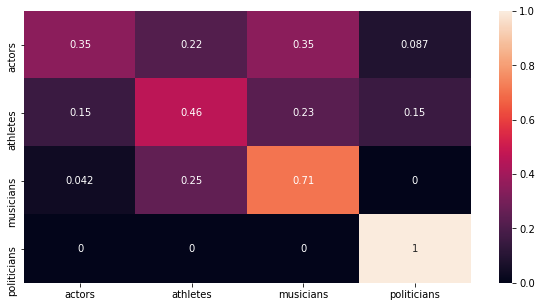

In [13]:
draw_confusion_matrix(y_test, y_pred, model.classes_, normalize=True)

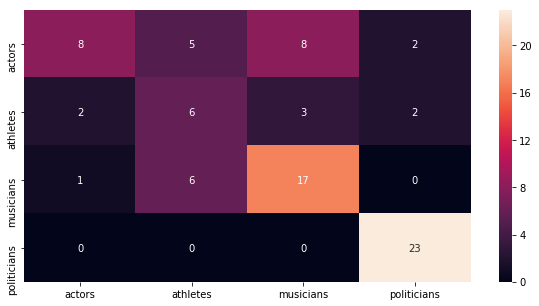

In [14]:
draw_confusion_matrix(y_test, y_pred, model.classes_, normalize=False)

In [15]:
def draw_tree(tree):
    export_graphviz(tree, out_file='tree.dot', feature_names = x_df.columns, class_names = model.classes_,
                rounded = True, proportion = False, precision = 2, filled = True)
    !dot -Tpng tree.dot -o tree.png -Gdpi=600
    return Image(filename = 'tree.png')

In [16]:
draw_tree(model.estimators_[0])